# P4 数据分析titanic乘客幸存因素 #

## 提出问题 ##

提出问题：本报告根据titanic-data.csv提供的数据，分析有哪些因素会影响乘客是否生还。

主要分析方向：舱位等级、性别、年龄、是否与直系或非直系亲属同行、船票价格、船票编号、所在船舱编号和上船港口。

## 数据清洗 ##

#### 1.读入数据 ####

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

Populating the interactive namespace from numpy and matplotlib


#### 2.按列检查是否有缺失值以及缺失比例 ####

In [2]:
def calc_deficiency(field):
    count = titanic_df[field].count()
    if count != 891:
        print field, "deficiency! Lack of proportion:", float((891 - count))/float(891)

calc_deficiency('PassengerId')
calc_deficiency('Survived')
calc_deficiency('Pclass')
calc_deficiency('Name')
calc_deficiency('Sex')
calc_deficiency('Age')
calc_deficiency('SibSp')
calc_deficiency('Parch')
calc_deficiency('Ticket')
calc_deficiency('Fare')
calc_deficiency('Cabin')
calc_deficiency('Embarked')

Age deficiency! Lack of proportion: 0.198653198653
Cabin deficiency! Lack of proportion: 0.771043771044
Embarked deficiency! Lack of proportion: 0.00224466891134


#### 3.数据填充 ####

(1)年龄数据存在缺失，缺失占比较高，这里选择用年龄的随机数填充:

In [3]:
#获取年龄的最大值
titanic_df['Age'].max()

80.0

In [4]:
#填充
titanic_df['Age'] = titanic_df['Age'].fillna(np.random.randint(0,80))

#查看是否填充
print titanic_df.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                          52
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


(2)船舱编号数据缺失值过多，放弃对该因素进行分析。

(3)上船港口数据存在缺失，缺失占比很低，这里直接删除相关记录:

In [5]:
titanic_df = titanic_df[titanic_df.Embarked.isin(['C', 'Q', 'S'])]

#检查缺失记录是否已删除
print titanic_df.iloc[60]
print titanic_df.iloc[61]

PassengerId                       61
Survived                           0
Pclass                             3
Name           Sirayanian, Mr. Orsen
Sex                             male
Age                               22
SibSp                              0
Parch                              0
Ticket                          2669
Fare                          7.2292
Cabin                            NaN
Embarked                           C
Name: 60, dtype: object
PassengerId                             63
Survived                                 0
Pclass                                   1
Name           Harris, Mr. Henry Birkhardt
Sex                                   male
Age                                     45
SibSp                                    1
Parch                                    0
Ticket                               36973
Fare                                83.475
Cabin                                  C83
Embarked                                 S
Name: 62, dtype:

## 数据探索 ##

### 1. 总体生还率 ###

([<matplotlib.patches.Wedge at 0x9ff50f0>,
 [Text(-0.397046,1.02584,u'victims'), Text(0.397046,-1.02584,u'survivals')],
 [Text(-0.216571,0.559551,u'61.8%'), Text(0.216571,-0.559551,u'38.2%')])

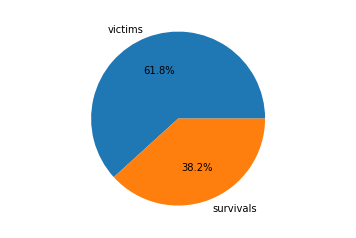

In [6]:
labels = 'victims', 'survivals'
plt.axis('equal') #设置饼图为正圆
plt.pie(titanic_df.Survived.value_counts(), labels=labels, autopct='%1.1f%%')

分析：总体来看，泰坦尼克号事件的生还率为61.6%。

### 2. 仓位等级（Pclass）与生还率 ###

仓位等级数目分布及生存情况堆积图：

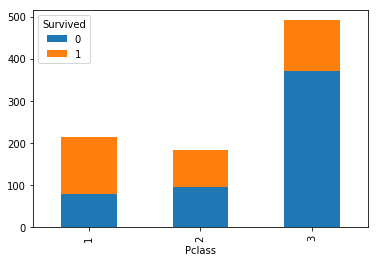

In [7]:
Survived_Pclass = titanic_df.groupby('Pclass').Survived.value_counts() #返回包含唯一值计数的对象
#print Survived_Pclass
#Survived_Pclass1 = titanic_df.groupby('Pclass')['Survived'].value_counts() #结果同上
#print Survived_Pclass1
Survived_Pclass = Survived_Pclass.unstack()  #旋转（必须是分层的）索引标签的级别
#print ''
#print Survived_Pclass

Survived_Pclass.plot.bar(stacked=True)

各仓位幸存率条形图：

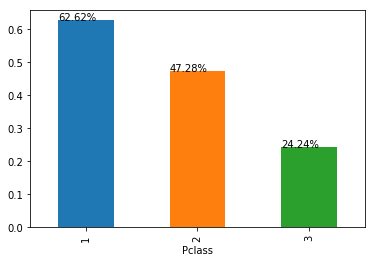

In [8]:
Survived_Pclass = titanic_df.groupby('Pclass').Survived.mean()
rect = Survived_Pclass.plot.bar(stacked=True)

for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x(), height, '%2.2f%%'%(height*100))

分析：仓位等级越高，生还概率越高。

### 3. 性别（Sex）与生还率 ###

统计不同性别人数:

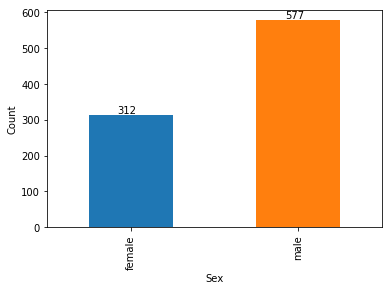

In [9]:
sex_distribution = titanic_df.groupby('Sex')['PassengerId'].count()

plt.xlabel('Sex')
plt.ylabel('Count')
rect = sex_distribution.plot(kind='bar')

#添加条形图的count
for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x()+0.17, height+5, height)

统计不同性别生还率：

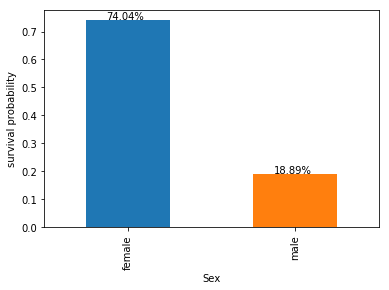

In [10]:
Survived_Sex = titanic_df.groupby('Sex').Survived.mean()

plt.xlabel('Sex')
plt.ylabel('survival probability')
rect = Survived_Sex.plot(kind='bar')

#添加条形图的百分比
for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x()+0.12, height+0.005, '%2.2f%%'%(height*100))

分析：女性生还概率明显高于男性。

### 4. 年龄（Age）与生还率 ###

对不同年龄段进行分组：

In [11]:
bins = np.arange(0,90,10) #设置组距
titanic_df['Age_group'] = pd.cut(titanic_df.Age, bins) #添加Age_group年龄分组列

统计不同年龄段的人数：

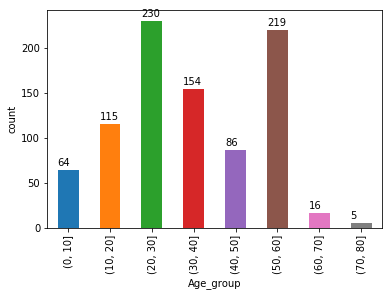

In [12]:
Age_Group_Count = titanic_df.groupby('Age_group').PassengerId.count()
plt.xlabel('Age_group')
plt.ylabel('count')
rect = Age_Group_Count.plot(kind='bar')

#添加条形图的count
for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x(), height+5, height)

统计不同年龄段的生还率：

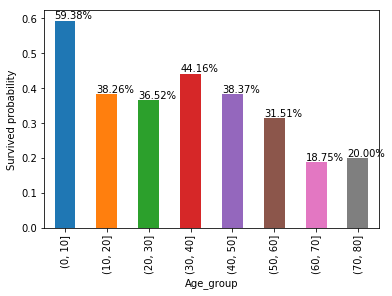

In [13]:
Survived_Age = titanic_df.groupby('Age_group').Survived.mean()

plt.xlabel('Age_group')
plt.ylabel('Survived probability')
rect = Survived_Age.plot(kind='bar')

#添加条形图的百分比
for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x(), height+0.005, '%2.2f%%'%(height*100))

### 5. 与直系亲属（Parch）/非直系亲属（SibSp）同行与生还率 ####

添加是否与直系或非直系亲属同行的属性列：

In [14]:
def add_with(df):
    return 1 if (df.SibSp != 0 or df.Parch != 0) else 0

titanic_df['With_relate'] = titanic_df.apply(add_with, axis=1) #添加With_relate列，用以区分是否与亲属同行

统计是否与直系或非直系亲属同行两种情况下的人数：

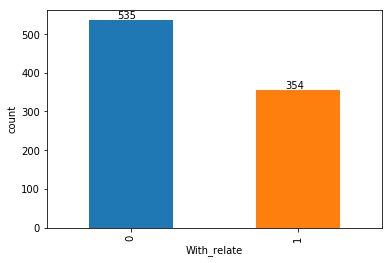

In [15]:
SibSp_Count = titanic_df.groupby('With_relate').PassengerId.count()

plt.xlabel('With_relate')
plt.ylabel('count')
rect = SibSp_Count.plot.bar()

#添加条形图的count
for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x()+0.17, height+5, height)

统计是否与直系或非直系亲属同行两种情况下的生还率：

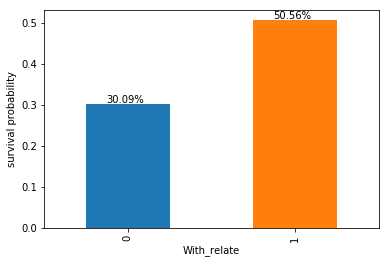

In [16]:
Survived_SibSp = titanic_df.groupby('With_relate').Survived.mean()

plt.xlabel('With_relate')
plt.ylabel('survival probability')
rect = Survived_SibSp.plot.bar()

#添加条形图的百分比
for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x()+0.12, height+0.005, '%2.2f%%'%(height*100))

分析：与亲属同行的乘客生还率略高于不与亲属同行的乘客。

### 6. 船票价格（Fare）与生还率 ###

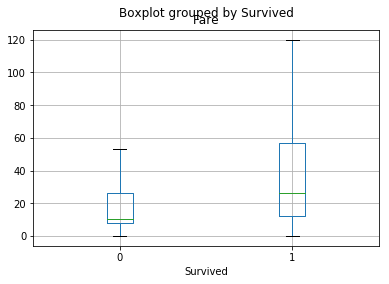

In [17]:
titanic_df.boxplot(column='Fare', by='Survived', showfliers=False)

分析：幸存者的船票价格水平相对更高。

### 7.乘客上船的港口（Embarked）与生还率 ###

乘客上船港口数据存在缺失，缺失占比不高，这里丢弃缺失的数据行。

各港口上船人数及幸存情况堆积图：

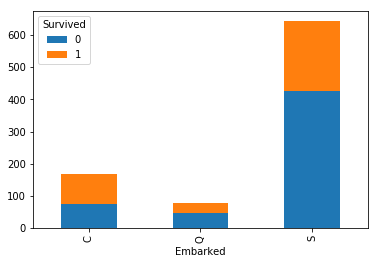

In [18]:
Survived_Embarked = titanic_df.groupby('Embarked').Survived.value_counts()
Survived_Embarked = Survived_Embarked.unstack()  #旋转（必须是分层的）索引标签的级别\n
Survived_Embarked.plot.bar(stacked=True)

各港口上船幸存比例条形图：

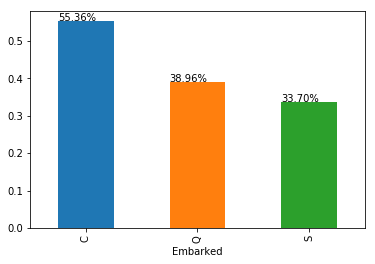

In [19]:
Survived_Embarked = titanic_df.groupby('Embarked').Survived.mean()
rect = Survived_Embarked.plot.bar()

#添加条形图的百分比
for p in rect.patches:
    height = p.get_height()
    plt.text(p.get_x(), height, '%2.2f%%'%(height*100))

分析：C港口上船的乘客生还率最高，其次是Q，最次是S。由于乘客上船的港口的数据有少许缺失，分析过程中忽略了存在缺失的记录，所以关于乘客上船的港口与幸存率的关系的分析存在偏差。

## 结论和局限性分析 ##

### 结论 ###

1.仓位等级越高，生还概率越高。

2.女性生还概率明显高于男性。

3.0-10岁分组的乘客生还率明显高于其他年龄组。60-80岁分组的乘客生还率略低于其他年龄组。

4.与亲属同行的乘客生还率略高于不与亲属同行的乘客。

5.幸存者的船票价格水平相对更高。

6.C港口上船的乘客生还率最高，其次是Q，最次是S。

### 局限性分析 ###

1.由于年龄数据存在缺失，用随机数进行填充，所以关于年龄的分析存在局限性，可能与实际情况有所偏差。另外，针对60-80岁乘客的分析结果，可能会因为这些分组的人数较少，而存在偶然性。

2.由于原始数据中船舱编号的数据缺失严重，所以未进行船舱编号和生还率的关系的分析。

3.由于乘客上船的港口的数据有少许缺失，分析过程中忽略了存在缺失的记录，所以关于乘客上船的港口与幸存率的关系的分析存在偏差。

## 参考信息 ##

[1] 官方文档及例子
https://matplotlib.org/api/pyplot_summary.html

[2] matplotlib绘制条形图
http://blog.csdn.net/zhangxiaojiakele/article/details/78014627

[3] 添加百分比到条形图
https://discussions.youdaxue.com/t/topic/46331

[4] 箱线图
http://blog.csdn.net/zenghaihong/article/details/53291372

[5] DataFrame 列运算
https://www.zhihu.com/question/54631460/answer/140656334

[6] 设置条形图分组及组距
https://discussions.youdaxue.com/t/topic/49330

[7] pandas.DataFrame排除特定行
https://www.cnblogs.com/wuzhiblog/p/python_pandas.html